# Exercise: "Human learning" with iris data

**Question:** Can you predict the species of an iris using petal and sepal measurements?

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Task 1

Read the iris data into a pandas DataFrame, including column names.

In [50]:

# define a list of column names (as strings)
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# define the URL from which to retrieve the data (as a string)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# retrieve the CSV file and add the column names
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=col_names)
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Task 2

Gather some basic information about the data.

In [51]:
# shape of the DataFrame
iris.shape

(150, 5)

In [52]:
# look at the head
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
# look at the data types for all the columns
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [54]:
# use describe to get statistical summaries
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
# how many of each "species" are there?
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## Task 3

Use sorting, split-apply-combine, and/or visualization to look for differences between species.

### sorting

In [56]:
# sort the DataFrame by petal_width and display the NumPy array (pandas hold NumPy array in DataFrame)
# iris.petal_width.sort_values().head()
iris.sort('petal_width').values

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


array([[5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'],
       [5.2, 3.4, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.1, 1.6, 0.2, 'Iris-setosa'],
       [5.5, 4.2, 1.4, 0.2, 'Iris-setosa'],
       [5.5, 3.5, 1.3, 0.2, 'Iris-setosa'],
       [4.4, 3.0, 1.3, 0.2, 'Iris-setosa'],
       [5.1, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [5.1, 3.8, 1.6, 0.2, 'Iris-setosa'],
       [4.6, 3.2, 1.4, 0.2, 'Iris-setosa'],
       [5.3, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.3, 1.4, 0.2, 'Iris-setosa'],
       [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'],
       [5.0, 3.2, 1.2, 0.2, 'Iri

### split-apply-combine

In [57]:
# mean of sepal_length grouped by species
iris.groupby('species').sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [58]:
# mean of all numeric columns grouped by species
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [59]:
# use describe() for all numeric columns, grouped by species
iris.groupby('species').describe()

petal_length  petal_width  sepal_length  sepal_width
species                                                                    
Iris-setosa     count     50.000000    50.000000     50.000000    50.000000
                mean       1.464000     0.244000      5.006000     3.418000
                std        0.173511     0.107210      0.352490     0.381024
                min        1.000000     0.100000      4.300000     2.300000
                25%        1.400000     0.200000      4.800000     3.125000
                50%        1.500000     0.200000      5.000000     3.400000
                75%        1.575000     0.300000      5.200000     3.675000
                max        1.900000     0.600000      5.800000     4.400000
Iris-versicolor count     50.000000    50.000000     50.000000    50.000000
                mean       4.260000     1.326000      5.936000     2.770000
                std        0.469911     0.197753      0.516171     0.313798
                min        3.000000     1.000000      4.900000     2.000000
                25%        4.000000     1.200000      5.600000     2.525000
                50%        4.350000     1.300000      5.900000     2.800000
                75%        4.600000     1.500000      6.300000     3.000000
                max        5.100000     1.800000      7.000000     3.400000
Iris-virginica  count     50.000000    50.000000     50.000000    50.000000
                mean       5.552000     2.026000      6.588000     2.974000
                std        0.551895     0.274650      0.635880     0.322497
                min        4.500000     1.400000      4.900000     2.200000
                25%        5.100000     1.800000      6.225000     2.800000
                50%        5.550000     2.000000      6.500000     3.000000
                75%        5.875000     2.300000      6.900000     3.175000
                max        6.900000     2.500000      7.900000     3.800000

### visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110b65190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1114afc90>]], dtype=object)

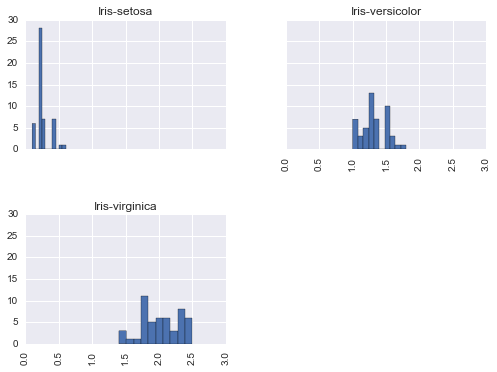

In [78]:
# histogram of petal_width grouped by species
iris.hist(column='petal_width', by='species', sharex=True, sharey=True)

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


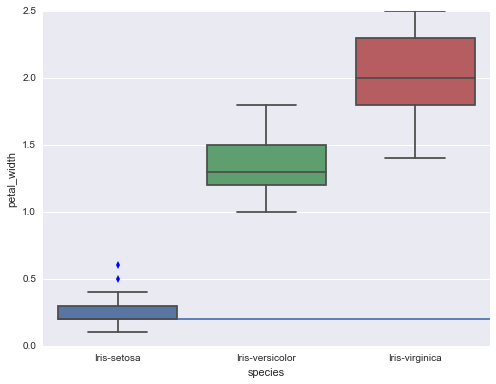

In [63]:
# box plot of petal_width grouped by species
iris.groupby('species').petal_width.plot(kind='box')
sns.boxplot(x='species', y='petal_width', data=iris)

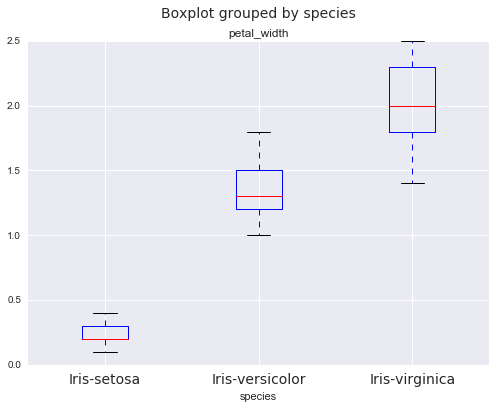

In [74]:
iris.boxplot(column='petal_width', by='species')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113231d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1135bb7d0>]], dtype=object)

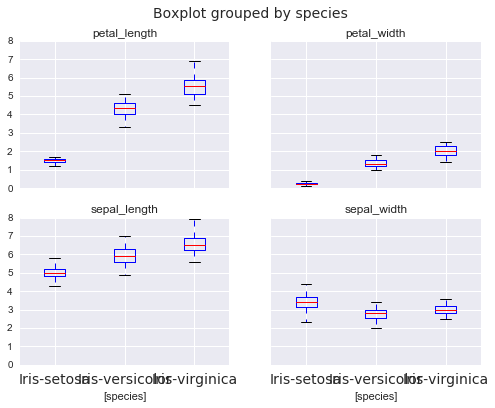

In [82]:
# box plot of all numeric columns grouped by species
iris.boxplot(by='species')

In [88]:
# map species to a numeric value so that plots can be colored by species
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# alternative method
iris['species_num'] = iris.species.factorize()[0]

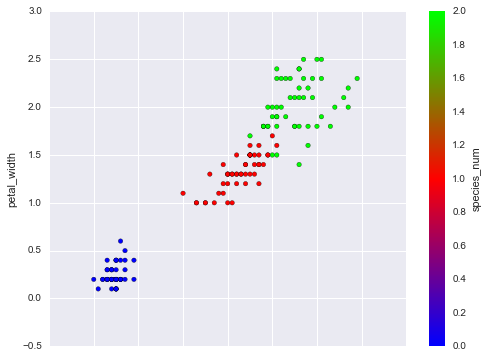

In [89]:
# scatter plot of petal_length vs petal_width colored by species
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg')

In [14]:
# scatter matrix of all features colored by species
pd.scatter_matrix(iris., c=iris.species)

## Task 4

Write down a set of rules that could be used to predict species based on iris measurements.

In [103]:
# define a new feature that represents petal area ("feature engineering")
iris['petal_area']=iris.petal_length * iris.petal_width
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0.28


In [105]:
# description of petal_area grouped by species
iris.groupby('petal_area').describe()

petal_length  petal_width  sepal_length  sepal_width  \
petal_area                                                               
0.11       count           1.0          1.0         1.000         1.00   
           mean            1.1          0.1         4.300         3.00   
           std             NaN          NaN           NaN          NaN   
           min             1.1          0.1         4.300         3.00   
           25%             1.1          0.1         4.300         3.00   
           50%             1.1          0.1         4.300         3.00   
           75%             1.1          0.1         4.300         3.00   
           max             1.1          0.1         4.300         3.00   
0.14       count           1.0          1.0         1.000         1.00   
           mean            1.4          0.1         4.800         3.00   
           std             NaN          NaN           NaN          NaN   
           min             1.4          0.1         4.800         3.00   
           25%             1.4          0.1         4.800         3.00   
           50%             1.4          0.1         4.800         3.00   
           75%             1.4          0.1         4.800         3.00   
           max             1.4          0.1         4.800         3.00   
0.15       count           4.0          4.0         4.000         4.00   
           mean            1.5          0.1         4.975         3.35   
           std             0.0          0.0         0.150         0.50   
           min             1.5          0.1         4.900         3.10   
           25%             1.5          0.1         4.900         3.10   
           50%             1.5          0.1         4.900         3.10   
           75%             1.5          0.1         4.975         3.35   
           max             1.5          0.1         5.200         4.10   
0.20       count           1.0          1.0         1.000         1.00   
           mean            1.0          0.2         4.600         3.60   
           std             NaN          NaN           NaN          NaN   
           min             1.0          0.2         4.600         3.60   
           25%             1.0          0.2         4.600         3.60   
           50%             1.0          0.2         4.600         3.60   
...                        ...          ...           ...          ...   
14.74      std             NaN          NaN           NaN          NaN   
           min             6.7          2.2         7.700         3.80   
           25%             6.7          2.2         7.700         3.80   
           50%             6.7          2.2         7.700         3.80   
           75%             6.7          2.2         7.700         3.80   
           max             6.7          2.2         7.700         3.80   
15.00      count           1.0          1.0         1.000         1.00   
           mean            6.0          2.5         6.300         3.30   
           std             NaN          NaN           NaN          NaN   
           min             6.0          2.5         6.300         3.30   
           25%             6.0          2.5         6.300         3.30   
           50%             6.0          2.5         6.300         3.30   
           75%             6.0          2.5         6.300         3.30   
           max             6.0          2.5         6.300         3.30   
15.25      count           1.0          1.0         1.000         1.00   
           mean            6.1          2.5         7.200         3.60   
           std             NaN          NaN           NaN          NaN   
           min             6.1          2.5         7.200         3.60   
           25%             6.1          2.5         7.200         3.60   
           50%             6.1          2.5         7.200         3.60   
           75%             6.1          2.5         7.200         3.60   
           max        

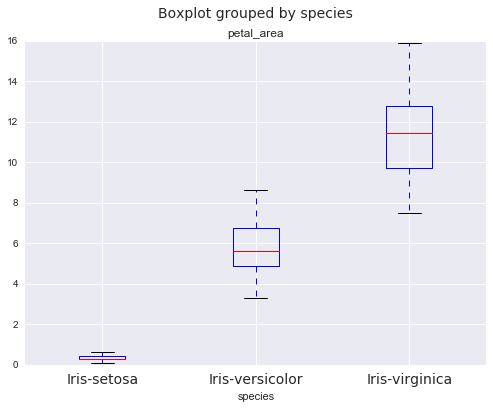

In [106]:
# box plot of petal_area grouped by species
iris.boxplot(column='petal_area', by='species')

In [110]:
# only show irises with a petal_area between 7 and 9
iris[(iris.petal_area > 7) & (iris.petal_area < 9)]

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
52,6.9,3.1,4.9,1.5,Iris-versicolor,1,7.35
56,6.3,3.3,4.7,1.6,Iris-versicolor,1,7.52
70,5.9,3.2,4.8,1.8,Iris-versicolor,1,8.64
72,6.3,2.5,4.9,1.5,Iris-versicolor,1,7.35
77,6.7,3.0,5.0,1.7,Iris-versicolor,1,8.50
83,6.0,2.7,5.1,1.6,Iris-versicolor,1,8.16
85,6.0,3.4,4.5,1.6,Iris-versicolor,1,7.20
86,6.7,3.1,4.7,1.5,Iris-versicolor,1,7.05
106,4.9,2.5,4.5,1.7,Iris-virginica,2,7.65
119,6.0,2.2,5.0,1.5,Iris-virginica,2,7.50


My set of rules for predicting species:

- If petal_area is less than 2, predict **setosa**.
- Else if petal_area is less than 7.4, predict **versicolor**.
- Otherwise, predict **virginica**.

## Bonus

Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.

In [23]:
# given a row of data, return a predicted species_num (0/1/2)
def classify_iris(row):

    # calculate the petal_area
    petal_area = row[2] * row[3]
    
    # predict the species based on the rules above    
    if petal_area < 2:
        prediction = 'setosa'
    elif petal_area < 7.4:
        prediction = 'versicolor'
    else:
        prediction = 'virginica'
    
    # map the species name to a numeric value
    species_to_num = {'setosa':0, 'versicolor':1, 'virginica':2}
    
    # return that value
    return species_to_num[prediction]

In [24]:
# print the first row
iris.iloc[0, :]

sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
species         Iris-setosa
species_num               0
petal_area             0.28
Name: 0, dtype: object

In [25]:
# print the last row
iris.iloc[149, :]

sepal_length               5.9
sepal_width                  3
petal_length               5.1
petal_width                1.8
species         Iris-virginica
species_num                  2
petal_area                9.18
Name: 149, dtype: object

In [26]:
# test the function on the first and last rows
print classify_iris(iris.iloc[0, :])
print classify_iris(iris.iloc[149, :])

0
2


In [27]:
# make predictions for all rows and store them in the DataFrame
iris['prediction'] = [classify_iris(row) for index, row in iris.iterrows()]

In [28]:
# calculate the percentage of correct predictions
sum(iris.species_num == iris.prediction) / 150.

0.97333333333333338